In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('employee_burnout_analysis-AI.xlsx')

In [3]:
df.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22740,fffe33003300380031003100,2008-09-05,Female,Product,No,3,6.0,7.3,0.55
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2,5.0,6.0,NaN
22742,fffe33003200310039003000,2008-07-28,Male,Product,No,3,5.0,8.1,0.69
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [4]:
df.shape

(22750, 9)

**Data Cleaning and Preprocessing**

***Removing Unwanted and Least Priority columns***

In [5]:
df.drop(['Employee ID','Date of Joining'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

***Removing Null Values***

In [7]:
df.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
df['Resource Allocation'].fillna(df['Resource Allocation'].mode()[0],inplace=True)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].mode()[0],inplace=True)
df['Burn Rate'].fillna(df['Burn Rate'].mode()[0],inplace=True)

**OTHER METHOD FOR CHANGING NULL VALUES**

null_num_columns = ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

for col in null_num_columns:

  df[col].fillna(df[col].mean(),inplace=True)

**Data Analysis and Visualization**

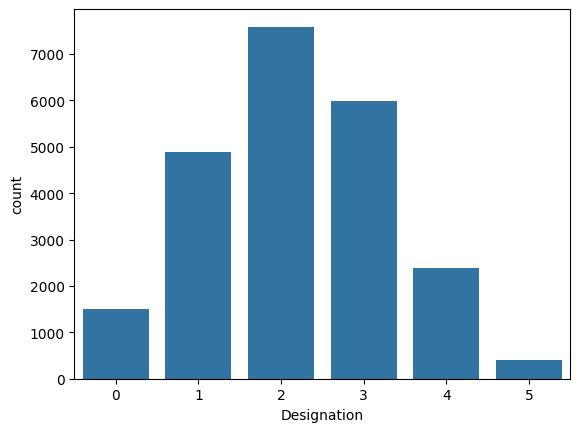

In [9]:
#Visualizing Designation
x = sns.countplot(x="Designation",data=df)

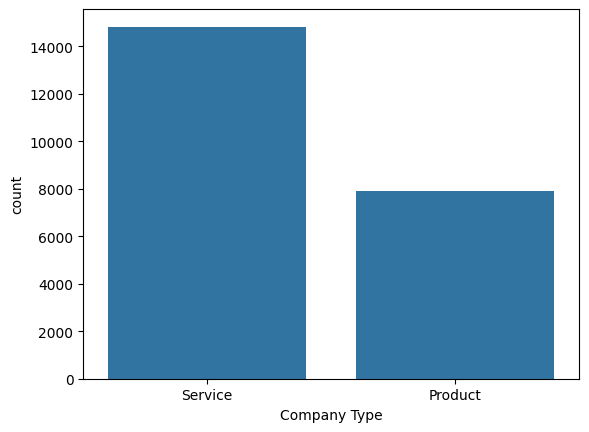

In [10]:
#Visualising Company Type
x = sns.countplot(x="Company Type",data=df)

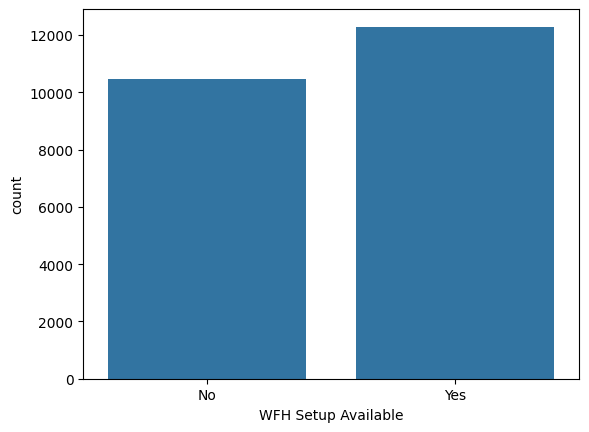

In [11]:
# Visualising WFH SetUp
x = sns.countplot(x="WFH Setup Available",data=df)

<Axes: xlabel='Designation', ylabel='Mental Fatigue Score'>

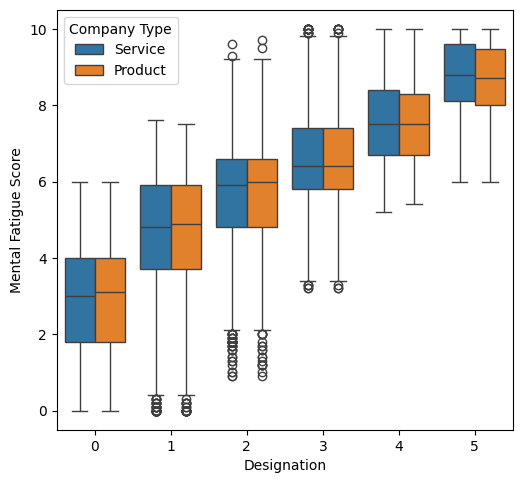

In [12]:
# Box plot of Mental Fatigue, Designation

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Designation', y = 'Mental Fatigue Score',hue='Company Type',data=df)

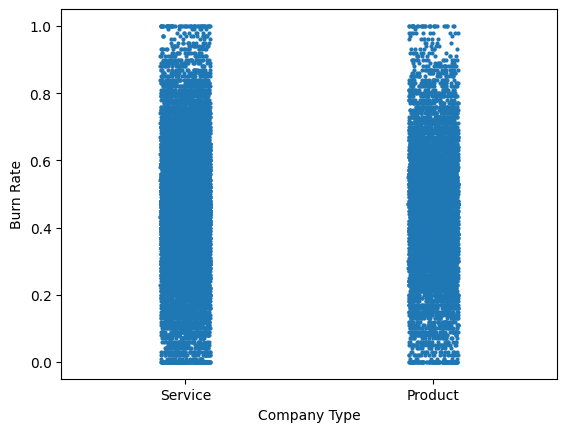

<Figure size 1000x500 with 0 Axes>

In [13]:
# Strip Plot of Company type and Burn Rate
sns.stripplot(x = "Company Type", y = "Burn Rate",size=3,data=df)
plt.figure(figsize=(10,5))
plt.show()

<Axes: xlabel='Gender', ylabel='Burn Rate'>

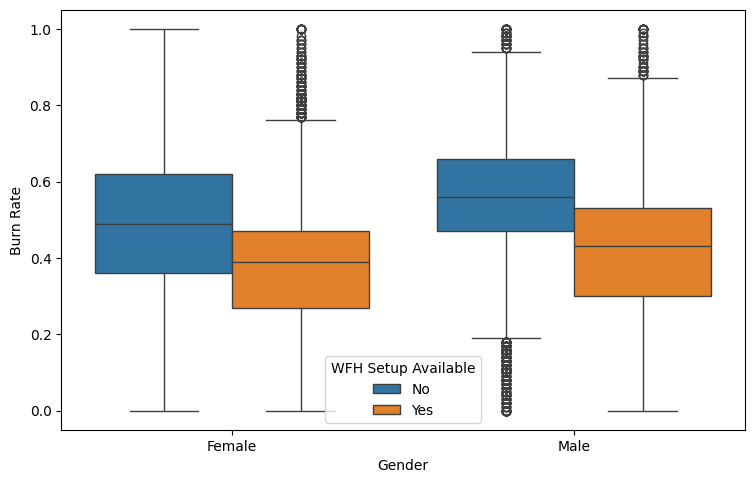

In [14]:
plt.figure(figsize=(30, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Gender', y = 'Burn Rate',hue='WFH Setup Available',data=df)

***Changing Objective data types into Numerical data types***

In [15]:
df.dtypes

Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Company Type'] = labelencoder.fit_transform(df['Company Type'])
df['WFH Setup Available'] = labelencoder.fit_transform(df['WFH Setup Available'])

**OTHER METHOD FOR CHANGING DATA TYPE INTO INT**

columns_to_encode = ['Gender', 'Company Type', 'WFH Setup Available']

for col in columns_to_encode:  
    df[col] = labelencoder.fit_transform(df[col])

In [17]:
df.dtypes

Gender                    int64
Company Type              int64
WFH Setup Available       int64
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

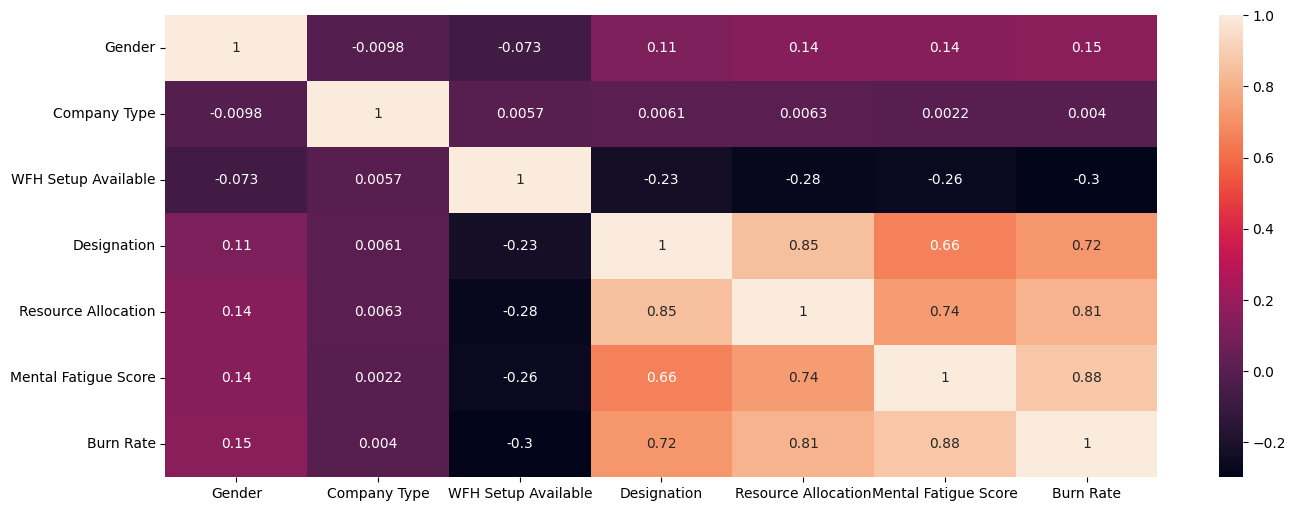

In [18]:
cor=(df.corr())
plt.figure(figsize=(16, 6))
sns.heatmap(cor, annot=True)
plt.show()

***Splitting columns for features and result***

In [19]:
features = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score']

In [20]:
df['Burn Rate'].unique()

array([0.16, 0.36, 0.49, 0.2 , 0.52, 0.29, 0.62, 0.33, 0.56, 0.67, 0.5 ,
       0.12, 0.4 , 0.51, 0.32, 0.39, 0.59, 0.22, 0.68, 0.57, 0.47, 0.46,
       0.61, 0.91, 0.44, 0.6 , 0.45, 0.19, 0.31, 0.81, 0.42, 0.53, 0.94,
       0.37, 0.65, 0.38, 0.15, 0.26, 0.28, 0.71, 0.8 , 0.63, 0.79, 0.72,
       0.34, 0.27, 0.66, 0.04, 0.05, 0.11, 0.41, 0.76, 0.43, 0.85, 0.35,
       0.  , 0.55, 0.48, 0.7 , 0.18, 0.23, 0.25, 0.75, 0.1 , 0.73, 0.58,
       0.88, 0.77, 0.3 , 0.06, 0.03, 0.69, 0.24, 0.74, 0.86, 0.92, 0.78,
       0.21, 0.98, 0.02, 0.82, 0.93, 0.83, 0.87, 0.64, 0.54, 0.17, 1.  ,
       0.08, 0.09, 0.14, 0.13, 0.07, 0.84, 0.99, 0.01, 0.97, 0.95, 0.9 ,
       0.96, 0.89])

***Splitting data into training and testing dataset***

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.75)

In [22]:
X_train = train[features]
Y_train = train['Burn Rate']

X_test = test[features]
Y_test = test['Burn Rate']

**Training Random Forest model**

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score

In [24]:
model = RandomForestRegressor(n_estimators=25, max_depth = 10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=25)

In [25]:
model.score(X_test, Y_test)

0.854475508636211

In [26]:
Y_pred = model.predict(X_test)
print(Y_pred)

[0.57349529 0.57573566 0.22732941 ... 0.28188258 0.34629109 0.48645329]


In [27]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Regression Report: ")
print("=========================================")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print("=========================================")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Regression Report: 
Mean Squared Error: 0.005418929150771439
Mean Absolute Error: 0.053670898520230874
R-squared: 0.854475508636211
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.05
R-squared (R2): 0.85
